In [11]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import mlflow
import joblib

In [12]:
# Cargar datos
data = pd.read_csv("../data/churn_data.csv")

# Explorar datos
print(data.head())
print(data["Churn"].value_counts())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [13]:
# Identificar columnas categóricas
categorical_columns = data.select_dtypes(include=["object"]).columns

# Aplicar Label Encoding a cada columna categórica
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Guardar el encoder para uso futuro

print(data.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [14]:
# Identificar columnas numéricas
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Aplicar Standard Scaler a cada columna numérica
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print(data.head())

   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0        5375       0      -0.439916        1           0 -1.277445   
1        3962       1      -0.439916        0           0  0.066327   
2        2564       1      -0.439916        0           0 -1.236724   
3        5535       1      -0.439916        0           0  0.514251   
4        6511       0      -0.439916        0           0 -1.236724   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0  

In [15]:
# Dividir datos
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7955997161107168
F1 Score: 0.5541795665634675


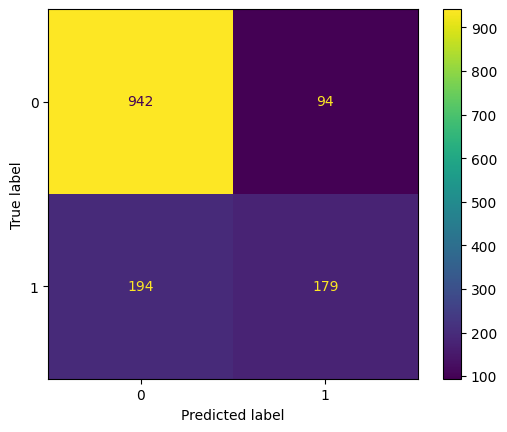

In [17]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
# Guardar LabelEncoders
joblib.dump(label_encoders, "../artifacts/label_encoders.pkl")

# Guardar StandardScaler
joblib.dump(scaler, "../artifacts/scaler.pkl")

['../artifacts/scaler.pkl']

In [ ]:
# Configurar MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # URL del servidor de MLflow
mlflow.set_experiment("Churn Prediction")        # Nombre del experimento

with mlflow.start_run():
    # Entrenar modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluar modelo
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Registrar métricas y modelo
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(model, "model")